# Training Component Classifier
A quick notebook which utilizes the ComponentClassifierTraining class to train classifier for structucal components.

Current model is adopted from sketched-a-net paper [1]&nbsp;:
- Achieved 98% in classifying 63 classes with 50 epochs and zero dropout
- 1 epoch takes around 15 seconds on Nvidia GeForce GTX 1060

[1]: https://arxiv.org/pdf/1501.07873.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from component_classifier_training import ComponentClassifierTraining

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
# Load data
training_data = np.load('path_to_training_data')
test_data = np.load('path_to_test_data')

In [3]:
# Create object for training components classifier
component_classifier = ComponentClassifierTraining(training_data, test_data, dropout=0.1)

In [4]:
# Train the classifier
component_classifier.train(epochs=8, verbose=1)

Train on 10 samples, validate on 10 samples
Epoch 1/8
10/10 [==============================] - 1s - loss: 1.1137 - acc: 0.2000 - val_loss: 1.7329 - val_acc: 0.0000e+00
Epoch 2/8
10/10 [==============================] - 0s - loss: 2.0436 - acc: 0.4000 - val_loss: 2.0777 - val_acc: 0.0000e+00
Epoch 3/8
10/10 [==============================] - 0s - loss: 1.4755 - acc: 0.3000 - val_loss: 1.2077 - val_acc: 0.0000e+00
Epoch 4/8
10/10 [==============================] - 0s - loss: 1.2626 - acc: 0.1000 - val_loss: 1.1238 - val_acc: 0.0000e+00
Epoch 5/8
10/10 [==============================] - 0s - loss: 1.1007 - acc: 0.4000 - val_loss: 1.1148 - val_acc: 0.0000e+00
Epoch 6/8
10/10 [==============================] - 0s - loss: 1.1017 - acc: 0.5000 - val_loss: 1.1150 - val_acc: 0.0000e+00
Epoch 7/8
10/10 [==============================] - 0s - loss: 1.0905 - acc: 0.3000 - val_loss: 1.1202 - val_acc: 0.0000e+00
Epoch 8/8
10/10 [==============================] - 1s - loss: 1.0933 - acc: 0.5000 - val

In [5]:
# Get validation accuray and lost, return a dict
print(component_classifier.get_stats())

{'validation_accuracy': 0.0, 'validation_loss': 1.1320358514785767}

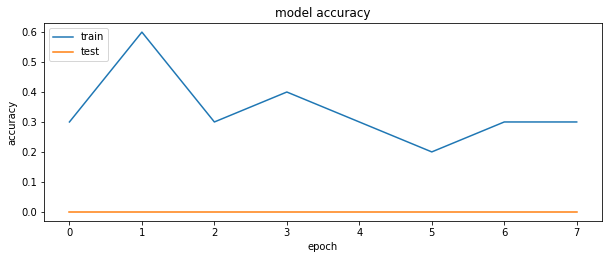

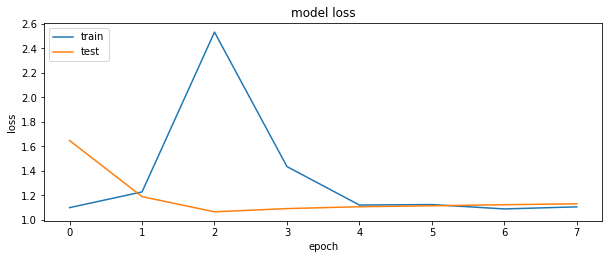

In [6]:
# Plot the train/validation loss and accuracies
component_classifier.plot_learning_curve()

In [7]:
component_classifier.print_model_summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 64)        14464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 256)       295168    
__________

In [ ]:
# The name should end with .h5
component_classifier.save('model_name.h5')